In [ ]:
#import the pandas libraries
import pandas as pd

Read the data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
data

,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632,C
678,7295,11328,1998-07-18,280440,60,4674,C
679,7304,11349,1995-10-29,419880,60,6998,C
680,7305,11359,1996-08-06,54024,12,4502,A


**Description**:
The "Financial Transactions" dataset contains information about various financial transactions conducted by different account holders. The dataset consists of 682 rows and 7 columns, each representing different attributes related to the transactions. The data spans over a period from 1994 to 1998.

1)id: A unique identifier for each transaction.

2)account_id: The ID associated with the account involved in the transaction.

3)date: The date when the transaction took place.

4)amount: The monetary amount of the transaction.

5)duration: The duration of the transaction in months.

6)payments: The number of payments made for the transaction.

7)status: The status code indicating the state of the transaction in terms of payment basis.

      -"A": Transaction is active and payments are up-to-date.
      
      -"B": Transaction is active with a minor delay in payments.
      
      -"C": Transaction is active, but there is a notable delay in payments.

## 1.)After Reading the dataset

In [ ]:
# a) Print the first 10 rows
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
data.head(10)


,id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373,A
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
3,4967,37,1998-10-14,318480,60,5308,D
4,4968,38,1998-04-19,110736,48,2307,C
5,4973,67,1996-05-02,165960,24,6915,A
6,4986,97,1997-08-10,102876,12,8573,A
7,4988,103,1997-12-06,265320,36,7370,D
8,4989,105,1998-12-05,352704,48,7348,C
9,4990,110,1997-09-08,162576,36,4516,C


In [ ]:

# b) Gain Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          682 non-null    int64 
 1   account_id  682 non-null    int64 
 2   date        682 non-null    object
 3   amount      682 non-null    int64 
 4   duration    682 non-null    int64 
 5   payments    682 non-null    int64 
 6   status      682 non-null    object
dtypes: int64(5), object(2)
memory usage: 37.4+ KB


In [ ]:
# c) Describe the data for better Understanding

data.describe()

,id,account_id,amount,duration,payments
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,151410.175953,36.492669,4190.664223
std,682.579279,3283.512681,113372.406310,17.075219,2215.830344
min,4959.000000,2.000000,4980.000000,12.000000,304.000000
25%,5577.500000,2967.000000,66732.000000,24.000000,2477.000000
50%,6176.500000,5738.500000,116928.000000,36.000000,3934.000000
75%,6752.500000,8686.000000,210654.000000,48.000000,5813.500000
max,7308.000000,11362.000000,590820.000000,60.000000,9910.000000


#Let us go the story

1) I am a data analyst at a Bank who has the loan payment data and I need to know about the person who is regularly paying(status) over the long period of Time(Duration)

In [ ]:
#Hint:I want the id who has higest status with more duration.
#Step 1: Filter rows with the highest status.
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
highest_status =data[(data['status'] == data['status'].max()) & (data['duration'] >= 48)]['id'].values[0] if not data.empty else None
highest_status

4967

In [ ]:
#step 2: Find the row with the longest duration among the highest status rows
highest_status_longest_duration =data[data['status'] == data['status'].max()].sort_values(by='duration', ascending=False).iloc[0]
highest_status_longest_duration

id                  4967
account_id            37
date          1998-10-14
amount            318480
duration              60
payments            5308
status                 D
Name: 3, dtype: object

In [ ]:
#step 3: Get the id of the row with the highest status and longest duration
id_with_highest_status_longest_duration =data[(data['status'] == data['status'].max()) & (data['duration'] == data[data['status'] == data['status'].max()]['duration'].max())]['id'].values[0]
print("ID with Highest Status and Longest Duration:", id_with_highest_status_longest_duration)

ID with Highest Status and Longest Duration: 4967


2) Now I want to know about the payments of the above person

In [ ]:
#I want the payments of the ID who has highest_status in longest_duration
#Step 1: Find the entry with the highest status and longest duration
import pandas as pd
loan_data = pd.read_csv('https://raw.githubusercontent.com/nunnarilabs/ml/master/Loan_Payment_Dataset/loans.csv')
max_status_entry =loan_data[(loan_data['status'] == loan_data['status'].max()) & (loan_data['duration'] == loan_data[loan_data['status'] == loan_data['status'].max()]['duration'].max())]
max_status_entry



,id,account_id,date,amount,duration,payments,status
3,4967,37,1998-10-14,318480,60,5308,D
26,5060,426,1994-07-19,252060,60,4201,D
110,5363,2051,1997-04-22,293880,60,4898,D
138,5447,2335,1997-11-12,541200,60,9020,D
187,5625,3189,1996-12-15,222180,60,3703,D
210,5724,3678,1995-02-05,316140,60,5269,D
212,5731,3711,1997-11-05,460980,60,7683,D
218,5758,3859,1997-05-02,307200,60,5120,D
338,6169,5700,1995-03-16,103680,60,1728,D
340,6175,5735,1996-02-21,290700,60,4845,D


In [ ]:
#Step 2: Retrieve the account_id for the selected entry
account_id_highest_status_longest_duration =loan_data[(loan_data['status'] == loan_data['status'].max()) & (loan_data['duration'] == loan_data[loan_data['status'] == loan_data['status'].max()]['duration'].max())]['account_id'].values[0]
account_id_highest_status_longest_duration


37

In [ ]:
#Step 3: Find the person's payments based on their account_id
target_account_id = 37
person_payments = loan_data[loan_data['account_id'] == target_account_id]['payments']
person_payments

3    5308
Name: payments, dtype: int64

3) It is my responsibility to check the  people who are irregular in paying the money

In [ ]:
##(Hint) find the id's who has low status
thrsh=loan_data['status'].min()
low_status_ids =loan_data[loan_data['status'] < thrsh]['id']
low_status_ids

Series([], Name: id, dtype: int64)

4) I can't maintain everyone I want to see the people who is not paying the money often and duration given to him

In [ ]:
#Step 1: Calculate the average payments for each account_id
average_payments =loan_data.groupby('account_id')['payments'].mean().reset_index()
average_payments

,account_id,payments
0,2,3373.0
1,19,2523.0
2,25,2523.0
3,37,5308.0
4,38,2307.0
...,...,...
677,11327,1632.0
678,11328,4674.0
679,11349,6998.0
680,11359,4502.0


In [ ]:
#Step 2: Filter the accounts with average payments below a certain threshold
threshold = 1000  # You can adjust this threshold(money considering point) as needed
accounts_below_threshold = average_payments[average_payments < threshold]
accounts_below_threshold

,account_id,payments
0,2.0,NaN
1,19.0,NaN
2,25.0,NaN
3,37.0,NaN
4,38.0,NaN
...,...,...
677,NaN,NaN
678,NaN,NaN
679,NaN,NaN
680,NaN,NaN


In [ ]:
#Step 3 Get the corresponding records from the original DataFrame
result =

print("Accounts with Below-Threshold Payments:")
print(result)

5) My View is more on the people with less time to pay

In [ ]:
#df_sorted_by_duration =
# Filter the DataFrame to show records with the shortest durations
shortest_durations =loan_data[loan_data['duration'] == loan_data['duration'].min()]

shortest_durations

,id,account_id,date,amount,duration,payments,status
1,4961,19,1996-04-29,30276,12,2523,B
2,4962,25,1997-12-08,30276,12,2523,A
6,4986,97,1997-08-10,102876,12,8573,A
10,4996,132,1996-11-06,88440,12,7370,A
11,5002,173,1994-05-31,104808,12,8734,A
...,...,...,...,...,...,...,...
665,7253,11079,1997-04-26,98304,12,8192,A
670,7264,11141,1997-10-07,44940,12,3745,A
672,7277,11231,1997-10-24,89280,12,7440,A
674,7284,11265,1993-09-15,52788,12,4399,A


Hurray!!! found the people

6)Now We can find from which year people started buying loan

### Note:
If the date is not in datetime format kindly convert using the below code

```
df['date'] = pd.to_datetime(df['date'])
```



In [ ]:
#Step 1: Convert the 'date' column to datetime
data['date'] =pd.to_datetime(loan_data['date'])
data['date']

0     1994-01-05
1     1996-04-29
2     1997-12-08
3     1998-10-14
4     1998-04-19
         ...    
677   1998-09-27
678   1998-07-18
679   1995-10-29
680   1996-08-06
681   1996-12-27
Name: date, Length: 682, dtype: datetime64[ns]

In [ ]:
#Step 2: Create a column year which contains the year of every data
loan_data['date'] = pd.to_datetime(loan_data['date'])

# Create a 'year' column
loan_data['year'] = loan_data['date'].dt.year
loan_data['year']



0      1994
1      1996
2      1997
3      1998
4      1998
       ... 
677    1998
678    1998
679    1995
680    1996
681    1996
Name: year, Length: 682, dtype: int64

In [ ]:
#Step 3: Find the minimum year from the 'date' column
loan_data['date'] = pd.to_datetime(loan_data['date'])

# Find the minimum year
min_year = loan_data['date'].dt.year.min()


print("Year when people started buying loans:", min_year)

Year when people started buying loans: 1993


7) Visualization the data is more important.I want to show Total Transaction Amounts Over Years to my manager



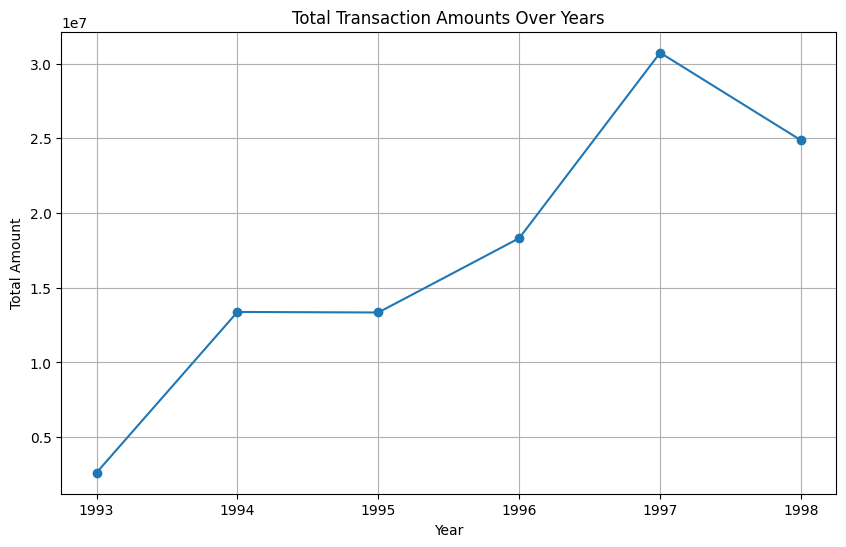

In [ ]:
#Import the matplot library
import matplotlib.pyplot as plt
# Group the data by Year and calculate total transaction amount for each year
yearly_amounts =loan_data.groupby(loan_data['date'].dt.year)['amount'].sum()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_amounts.index, yearly_amounts.values, marker='o')
plt.title('Total Transaction Amounts Over Years')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()